In [2]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [33]:
class MyLinearRegrassion:
    def __init__(self):
        self.w = None
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        assert len(y.shape) == 1 and len(X.shape) == 2
        assert X.shape[0] == y.shape[0]

        y = y[:, np.newaxis]
        l, n = X.shape
        X_train = np.hstack((X, np.ones((l, 1))))

        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y

        return self
    
    def predict(self, X):
        l, n = X.shape

        X_train = np.hstack((X, np.ones((l, 1))))

        y_pred = X_train @ self.w 

        return y_pred
    
    def get_weights(self):
        return self.w.copy()

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
def linear_expression(x):
    return 5 * x + 6

In [36]:
object_num = 50
X = np.linspace(-5, 5, object_num)
X

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

In [39]:
y = linear_expression(X) + np.random.randn(object_num) * 5
y

array([-13.1337242 , -21.16324561,  -9.58613824, -13.2196783 ,
       -15.01911795, -12.54780415,  -4.24738758, -17.04182641,
        -9.91878054,  -2.81670881,  -8.2432333 , -11.6464636 ,
        -9.58252675,  -4.15587135,  -3.15772492,  -4.79828453,
        -1.38697841,  -1.52464667,  -0.16137576,  -5.77480784,
         4.80575313,   4.42828061,   1.715966  ,   1.64232597,
         8.28247583,   5.85861766,   7.14662452,   6.57549067,
        17.29858159,  13.10008105,   7.89554195,  15.6079726 ,
        12.70957012,  18.13394848,   7.29434982,  26.53236406,
        26.04106253,  17.39441681,  17.5092919 ,  18.67550573,
        14.92790076,  21.70333508,  26.45533   ,  36.44520187,
        30.92755509,  21.26019022,  33.22915582,  27.13298147,
        23.81298905,  32.9213312 ])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

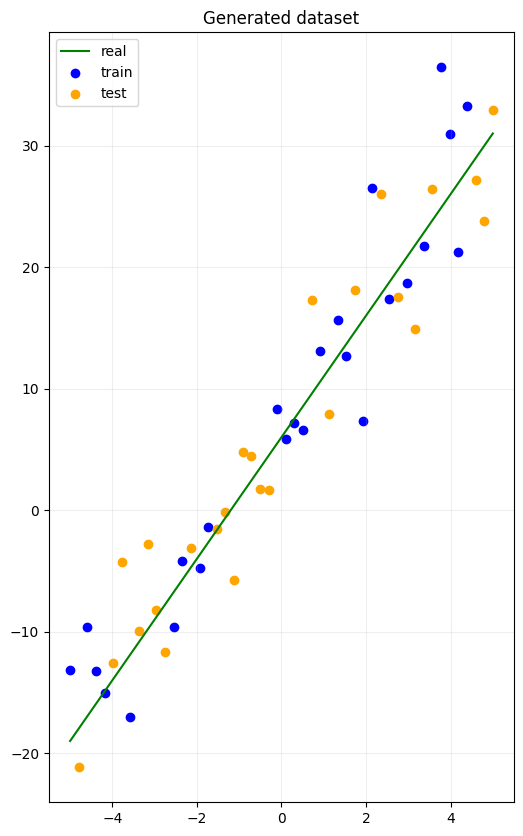

In [43]:
plt.figure(figsize=(6, 10))
plt.plot(X, linear_expression(X), label='real', c = 'g')
plt.scatter(X_train, y_train, label='train', c='b')
plt.scatter(X_test, y_test, label='test', c='orange')

plt.title('Generated dataset')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [42]:
regressor = MyLinearRegrassion()

regressor.fit(X_train[:, np.newaxis], y_train)

predictions = regressor.predict(X_test[:, np.newaxis])

w = regressor.get_weights()
w

array([[5.00514455],
       [7.07772978]])

In [48]:
x_min = np.min(X)
x_max = np.max(X)
X_new = np.linspace(x_min, x_max, 50)
def y_func(x_arr, k, b):
    return k * x_arr + b

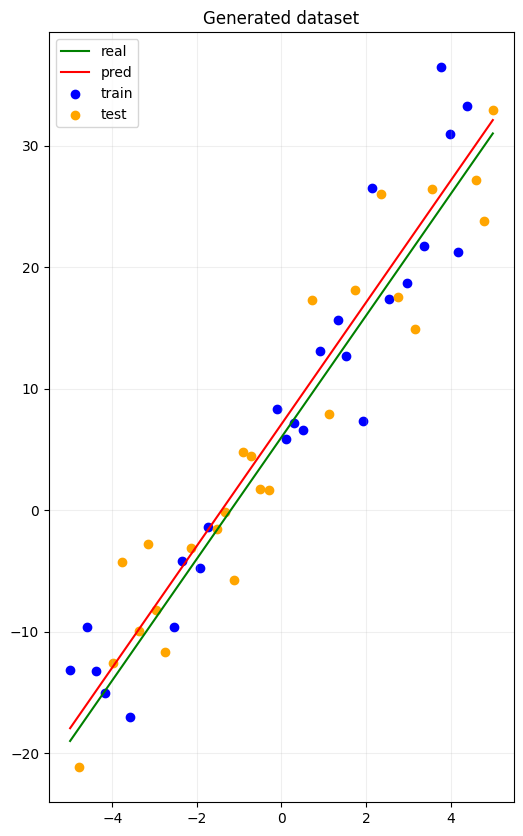

In [49]:
plt.figure(figsize=(6, 10))
plt.plot(X, linear_expression(X), label='real', c = 'g')
plt.plot(X_new, y_func(X_new, w[0], w[1]), label='pred', c='r')
plt.scatter(X_train, y_train, label='train', c='b')
plt.scatter(X_test, y_test, label='test', c='orange')

plt.title('Different predict')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

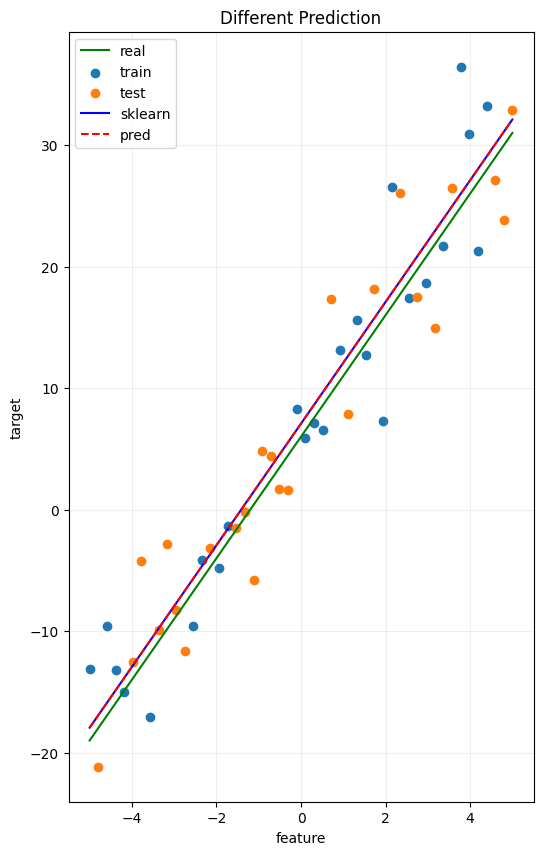

In [60]:
sk_reg = LinearRegression().fit(X_train[:, np.newaxis], y_train)

plt.figure(figsize=(6, 10))
plt.plot(X, linear_expression(X), label='real', c ='g')

plt.scatter(X_train, y_train, label= 'train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, sk_reg.predict(X[:, np.newaxis]), label='sklearn', c = 'b')
plt.plot(X_new, y_func(X_new, w[0], w[1]), label='pred', c='r', linestyle='--')

plt.title('Different Prediction')
plt.ylabel('target')
plt.xlabel('feature')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [61]:
sk_reg.coef_, sk_reg.intercept_

(array([5.00514455]), np.float64(7.077729781410002))

In [62]:
from sklearn.metrics import root_mean_squared_error

train_predictions = regressor.predict(X_train[:, np.newaxis])
test_predictions = regressor.predict(X_test[:, np.newaxis])

print('Train MSE: ', root_mean_squared_error(y_train, train_predictions))
print('Test MSE: ', root_mean_squared_error(y_test, test_predictions))

Train MSE:  4.6014586785547005
Test MSE:  4.3941656431363425


In [81]:
class MyGradientLinearRegression(MyLinearRegrassion):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    
    def fit(self, X, y, lr=0.01, max_iter=100):
        X = np.array(X)
        y = np.array(y)
        assert (len(y.shape) == 1) & (len(X.shape) == 2)
        assert X.shape[0] == y.shape[0]

        y = y[:, np.newaxis]
        l, n = X.shape

        X_train = np.hstack((X, np.ones((l, 1))))

        self.w = np.random.randn(n + 1, 1)

        self.losses = []
        for iter_num in range(max_iter):
            y_pred = self.predict(X)
            self.losses.append(root_mean_squared_error(y_pred, y))

            grad = self._calc_gradient(X_train, y, y_pred)

            assert grad.shape == self.w.shape, \
            f"gradient shape {grad.shape} is not equel weight shape {self.w.shape}"

            self.w -= lr * grad
        return self
    
    def _calc_gradient(self, X, y, y_pred):
        grad = 2. / X.shape[0] * (X.T @(y_pred - y))
        return grad

    def get_losses(self):
        return self.losses

In [82]:
regressor = MyGradientLinearRegression()

l = regressor.fit(X_train[:, np.newaxis],y_train, max_iter=100).get_losses()

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

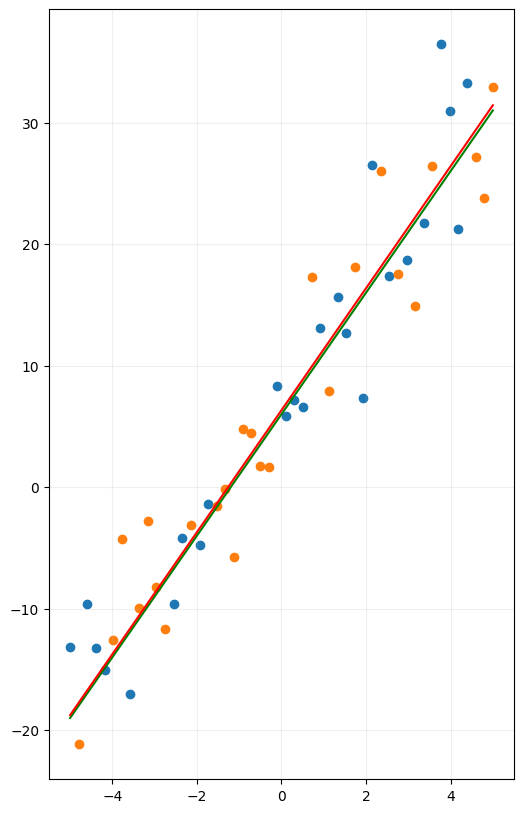

In [83]:
plt.figure(figsize=(6, 10))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predict', c='r')

plt.grid(alpha=0.2)
plt.show()

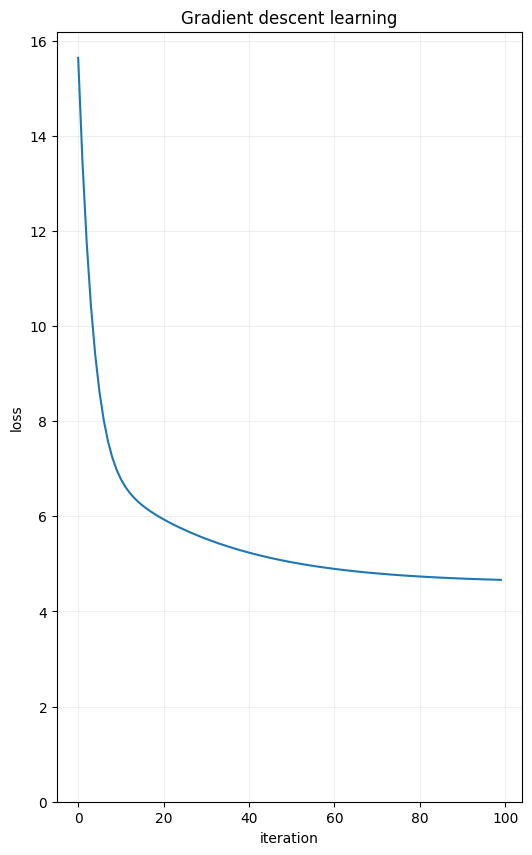

In [84]:
plt.figure(figsize=(6, 10))

plt.plot(l)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.ylim(bottom=0)
plt.grid(alpha=0.2)

plt.show()

In [85]:
class MySGDLinerRegression(MyGradientLinearRegression):
    def __init__(self, n_sample=10, **kwargs):
        super().__init__(**kwargs)
        self.w = None
        self.n_sample = n_sample
    
    def _calc_gradient(self, X, y, y_pred):
        inds = np.random.choice(np.arange(X.shape[0]), size=self.n_sample, replace=False)

        grad = 2. / self.n_sample * X[inds].T @ (y_pred[inds] - y[inds])
        return grad

In [86]:
regressor = MySGDLinerRegression()

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses()

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

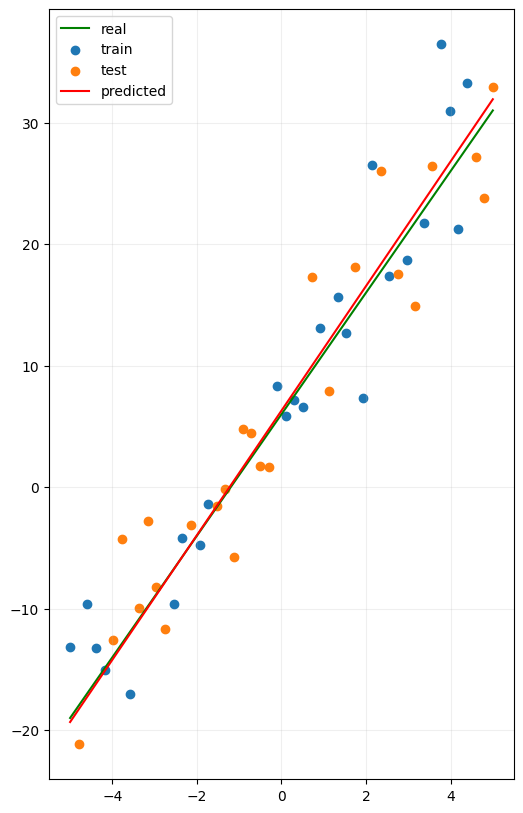

In [88]:
plt.figure(figsize=(6, 10))
plt.plot(X, linear_expression(X), label='real', c='g')


plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

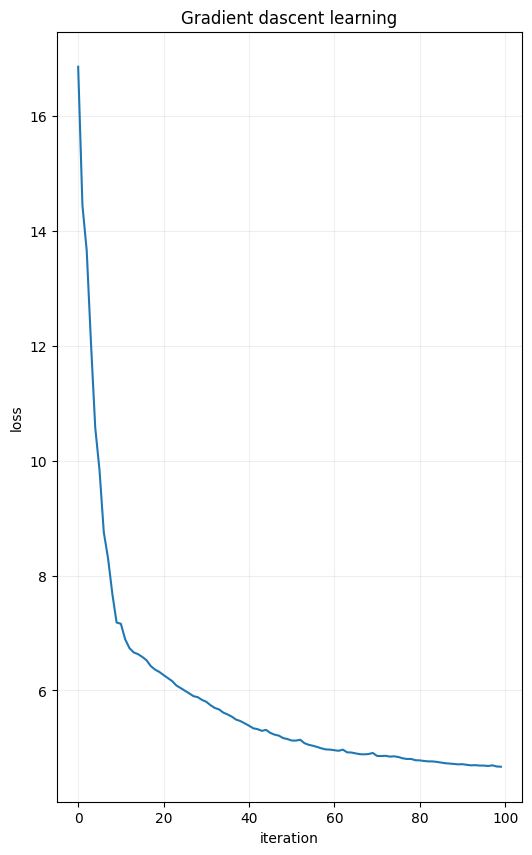

In [89]:
plt.figure(figsize=(6, 10))

plt.plot(l)

plt.title('Gradient dascent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.grid(alpha=0.2)
plt.show()

In [90]:
n_samples = [1, 4, 16]

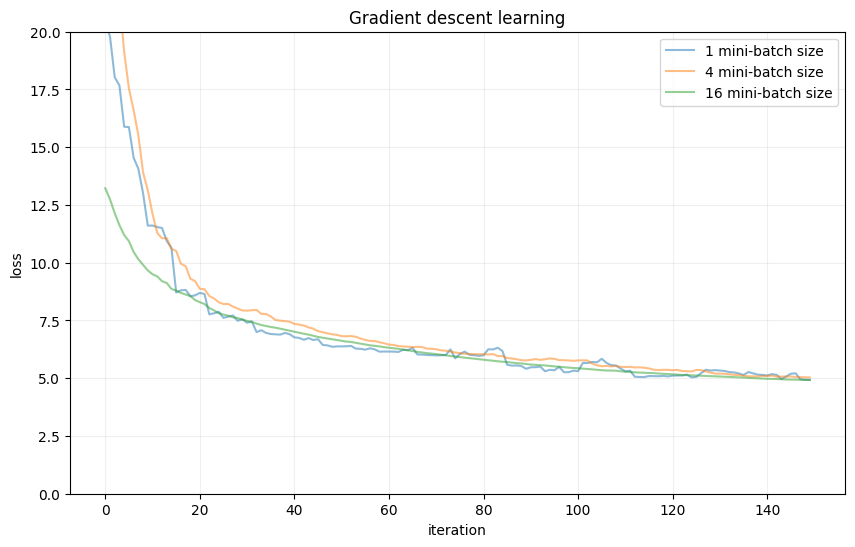

In [93]:
plt.figure(figsize=(10, 6))

for ns in n_samples:
    l = MySGDLinerRegression(n_sample=ns).fit(
        X_train[:, np.newaxis],
        y_train,
        lr=5e-3,
        max_iter=150
    ).get_losses()
    plt.plot(l, alpha=0.5, label=f'{ns} mini-batch size')

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')

plt.legend()
plt.ylim((0, 20))
plt.grid(alpha=0.2)
plt.show()